In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep',
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)

In [3]:
alpha = 0.05
cnt_exp = np.arange(1, 101)
list_fwer = 1 - (1 - alpha)**cnt_exp

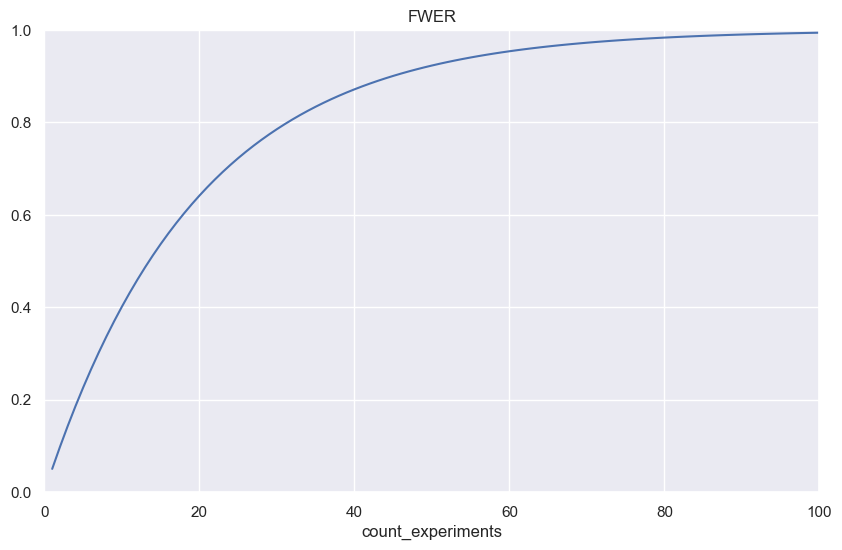

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=cnt_exp, y=list_fwer)
plt.ylim([0, 1])
plt.xlim([0, 100])
plt.xlabel('count_experiments')
plt.title('FWER')
plt.show()

In [31]:
alpha = 0.05
size = 100

list_pvalues = [np.random.uniform(low=0.0, high=1.0, size=size) for _ in range(10000)]

In [32]:
res = []
for pvalues in list_pvalues:
    res.append(sum(pvalues <= alpha) > 0)
print(np.mean(res))

0.9945


In [33]:
def bonferroni_method(pvalues, alpha=0.05):
    alpha_ = alpha / len(pvalues)
    return [pvalue <= alpha_ for pvalue in pvalues]

In [34]:
res = [int(np.sum(bonferroni_method(pvalues)) > 0) for pvalues in list_pvalues]
np.mean(res)

0.0465

In [35]:
def holm_method(pvalues, alpha=0.05):
    array_alpha = np.arange(len(pvalues), 0, -1)
    array_alpha = alpha / array_alpha
    sorted_pvalue_indexes = np.argsort(pvalues)
    res = np.zeros(len(pvalues))
    for idx, pvalue_index in enumerate(sorted_pvalue_indexes):
        pvalue = pvalues[pvalue_index]
        alpha_ = array_alpha[idx]
        if pvalue < alpha_:
            res[pvalue_index] = 1
        else:
            break
    res = res.astype(int)
    return res

In [36]:
res = [int(np.sum(holm_method(pvalues)) > 0) for pvalues in list_pvalues]
np.mean(res)

0.0465